# 1. Data Understanding
Memahami struktur dataset, melihat jumlah baris/kolom, tipe data, dan statistik dasar. Hal ini berguna untuk mendapatkan gambaran umum tentang data yang akan diproses dan dianalisis.

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')

print("Ukuran dataset:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Ukuran dataset: (918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          ----------

Dataset memiliki 918 baris dan 12 kolom. Dari tampilan 5 baris awal, terlihat fitur seperti usia, jenis kelamin, tipe nyeri dada, tekanan darah saat istirahat, kadar kolesterol, status gula darah puasa, hasil EKG, denyut jantung maksimum, adanya angina saat olahraga, nilai Oldpeak, kemiringan ST, dan label penyakit jantung. Output df.info() menunjukkan bahwa setiap kolom memiliki 918 data non-null dengan tipe data yang bervariasi (numerik dan objek), menandakan tidak ada missing value. Statistik deskriptif (df.describe()) mengungkapkan rata-rata, standar deviasi, nilai minimum, maksimum, dan persentil untuk fitur numerik, misalnya usia rata-rata sekitar 53,5 tahun dengan rentang 28 hingga 77 tahun serta tekanan darah rata-rata 132,4. Informasi ini memberikan gambaran umum mengenai distribusi dan penyebaran nilai dalam dataset sehingga kita siap melanjutkan ke tahap preprocessing dan analisis selanjutnya.

# 2. Data Preprocessing
### A. Penanganan Missing Values

Memastikan bahwa dataset bersih dari nilai kosong (missing value) sehingga tidak menganggu proses modeling.

In [ ]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


semua kolom memiliki nilai missing 0, yang berarti tidak ada data yang hilang. Kondisi ini membuat tahap penanganan missing value menjadi tidak diperlukan dan langsung saja melanjutkan ke proses preprocessing lainnya seperti encoding dan scaling.

### B. Encoding Data Kategorikal
Mengubah fitur-fitur kategorikal yang berupa string menjadi format numerik agar algoritma machine learning dapat memprosesnya.

In [3]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False

Dataset awal telah memiliki beberapa kolom kategorikal seperti Sex, ChestPainType, RestingECG, ExerciseAngina, dan ST_Slope. Setelah proses one-hot encoding (dengan parameter drop_first=True untuk menghindari dummy variable trap), kolom-kolom tersebut diubah menjadi kolom-kolom biner yang menunjukkan keberadaan kategori tertentu. Misalnya, kolom Sex_M menunjukkan apakah nilai pada kolom Sex adalah "M" (True jika ya, dan False jika tidak). Demikian pula, untuk ChestPainType, kolom-kolom seperti ChestPainType_ATA, ChestPainType_NAP, dan ChestPainType_TA dibuat untuk mengindikasikan masing-masing kategori nyeri dada.

### C. Scaling Fitur
Standarisasi fitur-fitur numerik agar memiliki skala yang sama, yang penting untuk algoritma seperti KMeans dan PCA yang sensitif terhadap perbedaan skala antar fitur.

In [4]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 3. Modelling
Kita, kami, dan saya akan melakukan dua pendekatan:

Klasifikasi untuk memprediksi apakah seseorang menderita penyakit jantung berdasarkan fitur-fitur yang ada.

Clustering untuk mengelompokkan pasien berdasarkan kemiripan fitur.

### A. Klasifikasi dengan Logistic Regression
Memprediksi status penyakit jantung dan mengevaluasi performa model menggunakan metrik standar seperti akurasi dan confusion matrix.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8804347826086957
Confusion Matrix:
 [[ 99  13]
 [ 20 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



Model menghasilkan akurasi sekitar 88,0%, menunjukkan bahwa prediksi pada data uji cukup akurat. Pada Confusion Matrix:

Kelas 0: Dari 112 data, model berhasil mengklasifikasikan 99 data dengan benar dan salah mengklasifikasikan 13 data.

Kelas 1: Dari 164 data, model mengklasifikasikan 144 data dengan benar dan meleset pada 20 data.

Nilai precision, recall, dan f1-score masing-masing sebesar 0.83/0.88/0.86 untuk kelas 0 dan 0.92/0.88/0.90 untuk kelas 1 menunjukkan bahwa model memiliki performa baik dalam mengidentifikasi kedua kelas. Hal ini memberikan gambaran bahwa Logistic Regression berhasil menangkap pola pada dataset heart disease dengan tingkat kesalahan yang relatif rendah.

### B. Clustering dengan KMeans
Mengelompokkan pasien dalam beberapa cluster berdasarkan kemiripan fitur, sehingga dapat dikenali pola atau segmentasi di antara pasien.

c:\Users\andiw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


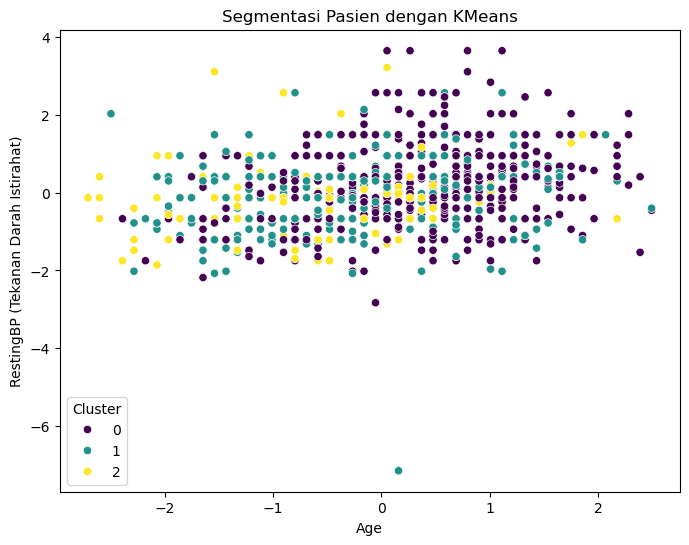

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

X_scaled['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled['Age'], y=X_scaled['RestingBP'], hue=X_scaled['Cluster'], palette='viridis')
plt.title("Segmentasi Pasien dengan KMeans")
plt.xlabel("Age")
plt.ylabel("RestingBP (Tekanan Darah Istirahat)")
plt.show()

Setelah menerapkan metode KMeans, data pasien terbagi ke dalam tiga klaster. Dari visualisasi menggunakan plot dengan sumbu Age dan RestingBP, tampak bahwa:

Klaster 0: Pasien pada kelompok ini cenderung memiliki nilai usia dan tekanan darah istirahat yang relatif lebih rendah. Ini bisa mengindikasikan bahwa kelompok ini memiliki profil risiko yang lebih ringan atau berbeda dibandingkan kelompok lain.

Klaster 1: Kelompok ini tampaknya mencakup pasien dengan nilai fitur yang berada di antara, baik dari segi usia maupun tekanan darah. Mereka bisa jadi memiliki karakteristik yang sedang, sehingga perlu analisis lebih lanjut untuk mengaitkan dengan risiko penyakit jantung.

Klaster 2: Pasien di klaster ini menunjukkan nilai usia dan tekanan darah istirahat yang cenderung lebih tinggi. Mengingat bahwa peningkatan usia dan tekanan darah sering dikaitkan dengan risiko penyakit jantung, kelompok ini mungkin merupakan segmen dengan risiko yang lebih besar.

Interpretasi ini didasarkan pada distribusi nilai dalam visualisasi. Untuk analisis yang lebih mendalam, sebaiknya dilakukan penghitungan rata-rata fitur per klaster, sehingga dapat dikonfirmasi karakteristik tiap kelompok. Dengan demikian, segmentasi ini dapat membantu dalam menentukan intervensi atau pemantauan yang lebih spesifik untuk masing-masing kelompok risiko.

# 4. Principal Component Analysis (PCA)
Mereduksi dimensi data sehingga bisa divisualisasikan secara lebih mudah (misalnya, pada bidang 2 dimensi) dan untuk memahami kontribusi masing-masing fitur secara komposit.

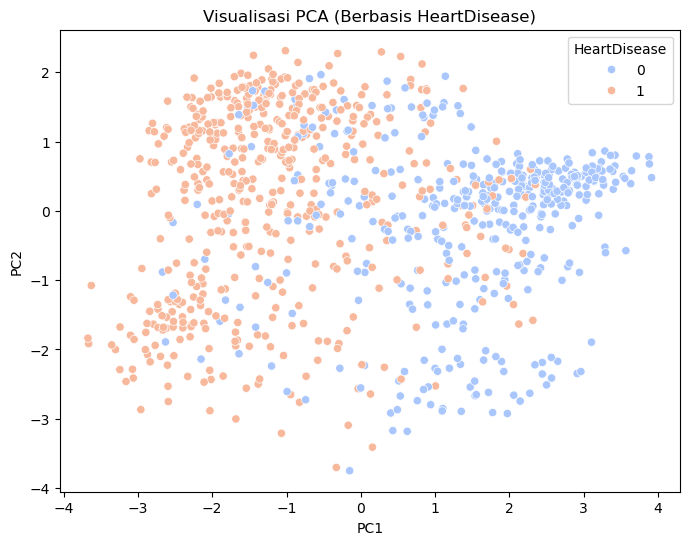

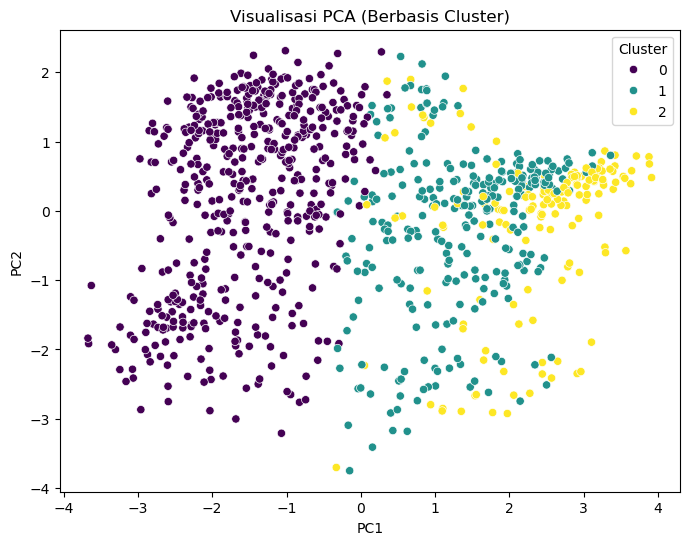

Explained Variance Ratio: [0.22586656 0.11008684]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled.drop('Cluster', axis=1))

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y.values
pca_df['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm')
plt.title("Visualisasi PCA (Berbasis HeartDisease)")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title("Visualisasi PCA (Berbasis Cluster)")
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

1.visuaslisasi PCA berbasis 'HeartDisease' merupakan scatter plot hasil PCA yang menampilkan dua komponen utama (PC1 dan PC2) dari data terkait penyakit jantung. Data diproyeksikan ke dalam bidang dua dimensi untuk mempermudah visualisasi dan analisis pola. Warna yang digunakan membedakan status penyakit jantung, dengan warna biru mewakili pasien tanpa penyakit jantung (HeartDisease=0) dan warna oranye untuk pasien dengan penyakit jantung (HeartDisease=1).

Terlihat adanya pemisahan antara kedua kelompok tersebut, yang menunjukkan bahwa proses reduksi dimensi melalui PCA berhasil menangkap sebagian informasi yang mampu membedakan antara pasien dengan dan tanpa penyakit jantung. Visualisasi ini sangat berguna sebagai langkah awal untuk memahami distribusi data dan potensi keterkaitan antar fitur yang berkontribusi pada klasifikasi penyakit.

2.visualisasi PCA berbasis Cluster merupakan scatter plot hasil PCA, di mana data telah direduksi ke dua komponen utama (PC1 dan PC2). Pada plot ini, data diwarnai berdasarkan hasil clustering, dengan:

Cluster 0 tampil dengan warna ungu,

Cluster 1 dengan warna teal, dan

Cluster 2 dengan warna kuning.

Sumbu x (PC1) dan sumbu y (PC2) menunjukkan nilai-nilai baru yang merupakan kombinasi linier dari fitur asli, yang membantu menampilkan struktur dan perbedaan antar kelompok. Visualisasi ini menunjukkan bahwa meskipun data berasal dari ruang berdimensi tinggi, PCA berhasil mengungkap pola pembagian klaster secara jelas ke dalam tiga kelompok yang terpisah. Dengan demikian, analisis ini mendukung bahwa segmentasi berdasarkan KMeans juga konsisten ketika dilihat melalui reduksi dimensi, sehingga dapat memberikan insight tentang karakteristik masing-masing klaster dalam ruang fitur yang lebih sederhana.

Output Explained Variance Ratio: [0.22586656 0.11008684] menunjukkan bahwa komponen utama pertama menangkap sekitar 22,6% variansi data, sementara komponen utama kedua menyumbangkan sekitar 11,0% variansi. Secara keseluruhan, kedua komponen tersebut bersama-sama menjelaskan sekitar 33,6% dari total variansi data. Meskipun kedua komponen ini tidak mencakup mayoritas informasi dari data asli, nilai-nilai ini cukup signifikan untuk memberikan gambaran tentang struktur data yang tersisa setelah reduksi dimensi.